This is a basic learning experiment for Tensorflow fundamentals, starting with the quickstart here: https://www.tensorflow.org/tutorials/quickstart/beginner

Keras is an API for easy neural-network building.

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as P
%matplotlib inline

print(f'Tensorflow Version: {tf.__version__}')

In [25]:
# Load MNIST
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# P.imshow(x_train[0] / 255.0)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [26]:
# Build a NN model
model = keras.models.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(10)
])

In [36]:
predictions = model(x_train[:1]).numpy()
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# tf.nn.softmax(predictions).numpy()
# loss_fn(y_train[:1], predictions).numpy()

# Compile Model
model.compile(
  optimizer='adam',
  loss=loss_fn,
  metrics=['accuracy']
)

In [37]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1406 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1083 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0757 - accuracy: 0.9765


In [38]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0751 - accuracy: 0.9755 - 484ms/epoch - 2ms/step


[0.07513061910867691, 0.9754999876022339]

In [ ]:
# Optionally add a Softmax layer to the model
probability_model = keras.Sequential([
  model,
  layers.Softmax()
])
# probability_model(x_test[:1])
P.imshow(x_test[0])
print(y_test[0])

# Fashion MNIST Classification

In [112]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# P.imshow(x_train[0])
# x_train[0].shape

In [114]:
train_images, test_images = train_images/255.0, test_images/255.0

In [115]:
class_names = [
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle Boot'
]

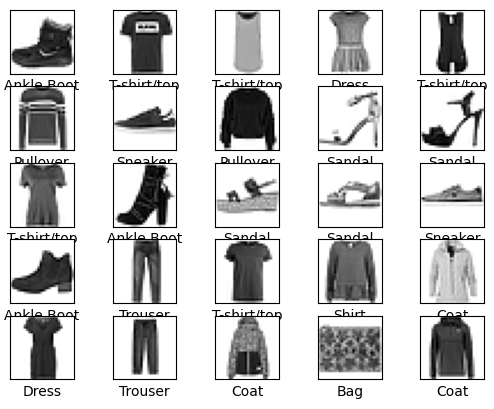

In [117]:
P.figure()
for i in range(25):
  P.subplot(5, 5, i+1)
  P.xticks([])
  P.yticks([])
  P.grid(False)
  P.imshow(train_images[i], cmap=P.cm.binary)
  P.xlabel(class_names[train_labels[i]])
  # P.colorbar()
P.show()

In [123]:
model = keras.Sequential([
  layers.Flatten(input_shape=(28, 28)),
  layers.Dense(128, activation='relu'),
#   layers.Dropout(0.2),
  layers.Dense(10),
#   layers.Softmax()
])

In [124]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
  optimizer='adam',
  loss=loss_fn,
  metrics=['accuracy']
)

In [125]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4975 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3746 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3349 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3111 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2949 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2816 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2566 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2463 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [126]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 709us/step - loss: 0.3327 - accuracy: 0.8808


[0.33267974853515625, 0.8808000087738037]

In [128]:
probability_model = keras.Sequential([
  model,
  layers.Softmax()
])

In [136]:
predictions = probability_model.predict(test_images)
print(f'Prediction for arg0: {class_names[np.argmax(predictions[0])]}')
print(f'Actual for arg0: {class_names[test_labels[0]]}')

313/313 [==============================] - 0s 649us/step
Prediction for arg0: Ankle Boot
Actual for arg0: Ankle Boot


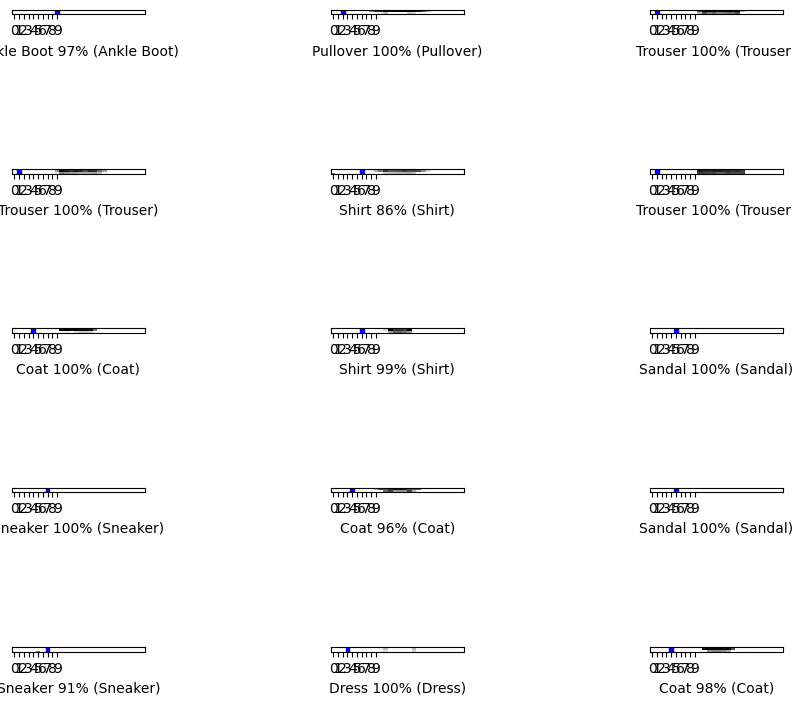

In [142]:
def plot_image(i, predictions, actual, img):
  actual, img = actual[i], img[i]
  P.grid(False)
  P.xticks([])
  P.yticks([])
  P.imshow(img, cmap=P.cm.binary)
  predicted_label = np.argmax(predictions)
  if predicted_label == actual:
    color = 'blue'
  else:
    color = 'red'
  P.xlabel('{} {:2.0f}% ({})'.format(
    class_names[predicted_label],
    100*np.max(predictions),
    class_names[actual],
    color=color
  ))
  
def plot_value_array(i, predictions, actual):
  actual = actual[i]
  P.grid(False)
  P.xticks(range(10))
  P.yticks([])
  plot = P.bar(range(10), predictions, color='#777777')
  P.ylim([0, 1])
  predicted_label = np.argmax(predictions)
  plot[predicted_label].set_color('red')
  plot[actual].set_color('blue')

# i = 12
# P.figure(figsize=(6, 3))
# P.subplot(1, 2, 1)
# plot_image(i, predictions[i], test_labels, test_images)
# P.subplot(1, 2, 2)
# plot_value_array(i, predictions[i], test_labels)
# P.show()

num_rows, num_cols = 5, 3
num_images = num_rows * num_cols
P.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  P.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  P.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_value_array(i, predictions[i], test_labels)
# P.tight_layout()
P.show()

## Cifar10

In [168]:
cifar10_ds = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10_ds.load_data()

# P.imshow(x_train[2])
# print(f'min={min(y_train)}, max={max(y_train)}')

x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# str([i for i in y_train[0]])
y_train[0]

In [175]:
model = keras.Sequential([
  layers.Input(shape=(32, 32, 3)),
  layers.Conv2D(2, 5, input_shape=(32, 32, 3), strides=5, activation='relu'),
  layers.Dense(10),
])

model.compile(
  optimizer='adam',
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, epochs=10)

In [ ]:
probability_model = keras.Sequential([
  model,
  layers.Softmax()
])

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
n = 10
predictions = probability_model.predict(x_test[:n])
for i in range(n):
  print(f'expected={y_test[i]}, actual={np.argmax(predictions[i])}')

In [ ]:
probability_model.summary()